# Launch object detection *training*

## Installation

You should select a runtime with GPU first: (Runtime -> Change Runtime Type = GPU)

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
!apt-get update 
!apt-get -y install libsm6 libxext6 libxrender-dev libcap-dev ffmpeg

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1371 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:

In [7]:
!apt-get -y install git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  git-man less libcurl3-gnutls liberror-perl libssl1.0.0 libxmuu1
  openssh-client xauth
Suggested packages:
  gettext-base git-daemon-run | git-daemon-sysvinit git-doc git-el git-email
  git-gui gitk gitweb git-cvs git-mediawiki git-svn keychain libpam-ssh
  monkeysphere ssh-askpass
The following NEW packages will be installed:
  git git-man less libcurl3-gnutls liberror-perl libssl1.0.0 libxmuu1
  openssh-client xauth
0 upgraded, 9 newly installed, 0 to remove and 48 not upgraded.
Need to get 6798 kB of archives.
After this operation, 42.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 less amd64 487-0.1 [112 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libssl1.0.0 amd64 1.0.2n-1ubuntu5.3 [1088 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxmuu1

In [8]:
!pip install --upgrade git+https://github.com/surfriderfoundationeurope/mot.git

  Cloning https://github.com/surfriderfoundationeurope/mot.git to /tmp/pip-req-build-6nn8p01m
  Running command git clone -q https://github.com/surfriderfoundationeurope/mot.git /tmp/pip-req-build-6nn8p01m
     |████████████████████████████████| 28.2MB 10.7MB/s eta 0:00:01
     |████████████████████████████████| 296kB 140.6MB/s eta 0:00:01
     |████████████████████████████████| 61kB 36.0MB/s  eta 0:00:01
     |████████████████████████████████| 2.1MB 79.1MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 71.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 32.9MB/s  eta 0:00:01
     |████████████████████████████████| 102kB 39.3MB/s ta 0:00:01
     |████████████████████████████████| 450kB 120.3MB/s eta 0:00:01
     |████████████████████████████████| 276kB 126.4MB/s eta 0:00:01
     |████████████████████████████████| 829kB 85.8MB/s eta 0:00:01
     |████████████████████████████████| 163kB 108.1MB/s eta 0:00:01
     |████████████████████████████████| 133kB 129.1M

In [95]:
!git clone https://github.com/rafaelpadilla/Object-Detection-Metrics.git

Cloning into 'Object-Detection-Metrics'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 473 (delta 10), reused 26 (delta 7), pack-reused 437
Receiving objects: 100% (473/473), 2.70 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (198/198), done.


## Training

### Downloading dataset

In [7]:
import wget
from zipfile import ZipFile

wget.download("http://files.heuritech.com/raw_files/dataset_surfrider_cleaned.zip", ".")

with ZipFile('dataset_surfrider_cleaned.zip', 'r') as zipObj:
     zipObj.extractall()

### Download pretrained weights on COCO

In [8]:
wget.download("http://models.tensorpack.com/FasterRCNN/COCO-MaskRCNN-R50FPN2x.npz", ".")

'./COCO-MaskRCNN-R50FPN2x (1).npz'

### Launch the training

See this [file](https://github.com/surfriderfoundationeurope/mot/blob/master/src/mot/object_detection/README.md) to choose the architecture you want and the according pre trained weights. The weights downloaded above correspond to ResNet50-FPN with 2X scheduling.  
Since we are not interested in segmentation, we set MODE_MASK=False. Also, because the dataset is pretty small, we don't need to train the network for a lot of steps. We decrease the learning rate at steps (250,500,750) * 8 GPUs, correspoding to the steps (2000, 4000, 6000).

In [27]:
!python3 train.py --load COCO-MaskRCNN-R50FPN2x.npz --logdir resnet50_fpn --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False TRAIN.LR_SCHEDULE=250,500,750

[0416 20:40:14 @logger.py:90] Argv: train.py --load COCO-MaskRCNN-R50FPN2x.npz --logdir resnet50_fpn --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False TRAIN.LR_SCHEDULE=250,500,750
[0416 20:40:14 @train.py:73] Environment Information:
--------------------  -------------------------------------------------------------------
sys.platform          linux
Python                3.6.9 (default, Nov  7 2019, 10:44:02) [GCC 8.3.0]
Tensorpack            v0.9.8-0-gb6318616
Numpy                 1.18.1
TensorFlow            1.15.2/v1.15.0-92-g5d80e1e
TF Compiler Version   7.3.1 20180303
TF CUDA support       True
TF MKL support        False
TF XLA support        False
Nvidia Driver         /usr/lib/x86_64-linux-gnu/libnvidia-ml.so.440.64.00
CUDA                  /usr/local/cuda-10.0/targets/x86_64-linux/lib/libcudart.so.10.0.130
CUDNN                 /usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.2
NCCL
CUDA_VISIBLE_DEVICES  None
GPU 0                 TITAN RTX
GPU 1                 GeFor

### Visualize predictions

In [25]:
!python3 -m predict --load resnet50_fpn/model-3000 --predict dataset_surfrider_cleaned/Images_md5/9ddc58812851ad643114930524601f10 --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False


{'BACKBONE': {'FREEZE_AFFINE': False,
              'FREEZE_AT': 2,
              'NORM': 'FreezeBN',
              'RESNET_NUM_BLOCKS': [3, 4, 6, 3],
              'STRIDE_1X1': False,
              'TF_PAD_MODE': False,
              'WEIGHTS': ''},
 'CASCADE': {'BBOX_REG_WEIGHTS': [[10.0, 10.0, 5.0, 5.0], [20.0, 20.0, 10.0, 10.0],
                                  [30.0, 30.0, 15.0, 15.0]],
             'IOUS': [0.5, 0.6, 0.7]},
 'DATA': {'ABSOLUTE_COORD': True,
          'BASEDIR': '/workspace/mot/dataset_surfrider_cleaned',
          'CLASS_NAMES': [],
          'NUM_CATEGORY': -1,
          'NUM_WORKERS': 10,
          'TRAIN': ('mot_train',),
          'VAL': ('mot_val',)},
 'FPN': {'ANCHOR_STRIDES': (4, 8, 16, 32, 64),
         'CASCADE': False,
         'FRCNN_CONV_HEAD_DIM': 256,
         'FRCNN_FC_HEAD_DIM': 1024,
         'FRCNN_HEAD_FUNC': 'fastrcnn_2fc_head',
         'MRCNN_HEAD_FUNC': 'maskrcnn_up4conv_head',
         'NORM': 'None',
         'NUM_CHANNEL': 256,
      

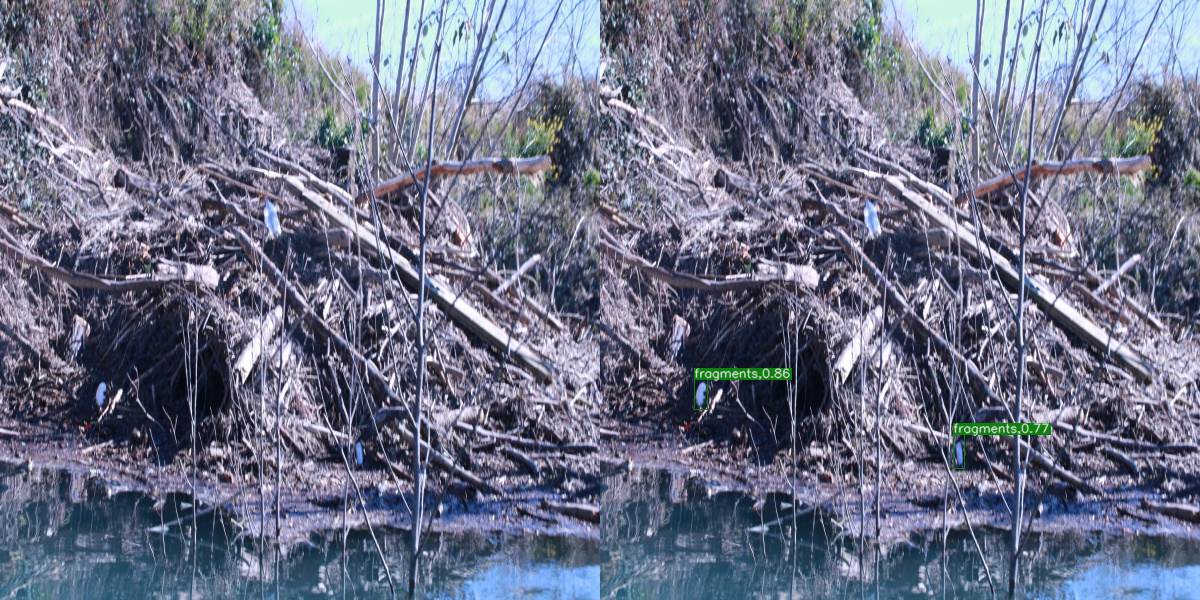

In [28]:
from IPython.display import Image
Image('output.png')

### Validation

In [84]:
!python3 predict.py --load resnet50_fpn/model-3000 --evaluate=eval_out.json --config DATA.BASEDIR=validate MODE_MASK=False


{'BACKBONE': {'FREEZE_AFFINE': False,
              'FREEZE_AT': 2,
              'NORM': 'FreezeBN',
              'RESNET_NUM_BLOCKS': [3, 4, 6, 3],
              'STRIDE_1X1': False,
              'TF_PAD_MODE': False,
              'WEIGHTS': ''},
 'CASCADE': {'BBOX_REG_WEIGHTS': [[10.0, 10.0, 5.0, 5.0], [20.0, 20.0, 10.0, 10.0],
                                  [30.0, 30.0, 15.0, 15.0]],
             'IOUS': [0.5, 0.6, 0.7]},
 'DATA': {'ABSOLUTE_COORD': True,
          'BASEDIR': '/workspace/mot/dataset_surfrider_cleaned',
          'CLASS_NAMES': [],
          'NUM_CATEGORY': -1,
          'NUM_WORKERS': 10,
          'TRAIN': ('mot_train',),
          'VAL': ('mot_val',)},
 'FPN': {'ANCHOR_STRIDES': (4, 8, 16, 32, 64),
         'CASCADE': False,
         'FRCNN_CONV_HEAD_DIM': 256,
         'FRCNN_FC_HEAD_DIM': 1024,
         'FRCNN_HEAD_FUNC': 'fastrcnn_2fc_head',
         'MRCNN_HEAD_FUNC': 'maskrcnn_up4conv_head',
         'NORM': 'None',
         'NUM_CHANNEL': 256,
      

In [16]:
import json
import os

In [17]:
results = json.load(open("./eval_out.json-mot_val"))

In [19]:
images = set()
for i in results:
    images.add(i['image_id'])

In [88]:
opened = {}
os.mkdir("./predictions")
for item in results:
    op = 'a'
    if item['image_id'] not in opened:
        opened[item['image_id']] = 1
        op='w'
    with open("./predictions/{}.txt".format(item['image_id']),op) as out_file:
        bb = [ int(i) for i in item['bbox']]
        out_file.write(item['category_id'] + " {:.3f} ".format(item['score']) + " ".join([str(a) for a in bb]) + '\n')

In [89]:
PATH = './validate'
dataset = []
with open(PATH+"/dataset.json") as f:
    for line in f:
        dataset.append(json.loads(line))
valid = dataset[-70:]

In [93]:
os.mkdir(PATH+"/valid_annot/")
os.mkdir(PATH+"/valid_annot/groundtruths/")
for item in valid:
    with open(PATH+"/valid_annot/groundtruths/{}.txt".format(item['md5']),'w') as out_file:
        for box in item['labels']:
            bb = [ int(i) for i in box['bbox']]
            out_file.write(box['label'] + " " + " ".join([str(a) for a in bb]) + '\n')

In [96]:
os.mkdir("./plots/")

In [101]:
%pwd

'/tf'

In [102]:
!python3 Object-Detection-Metrics/pascalvoc.py -gt /tf/validate/valid_annot/groundtruths/ -det /tf/predictions/ -sp /tf/plots/

Figure(640x480)
Figure(640x480)
Figure(640x480)
AP: 88.68% (bottles)
AP: 77.34% (fragments)
AP: 58.45% (others)
mAP: 74.82%


In [1]:
%ls ./plots/

bottles.png  fragments.png  others.png  results.txt


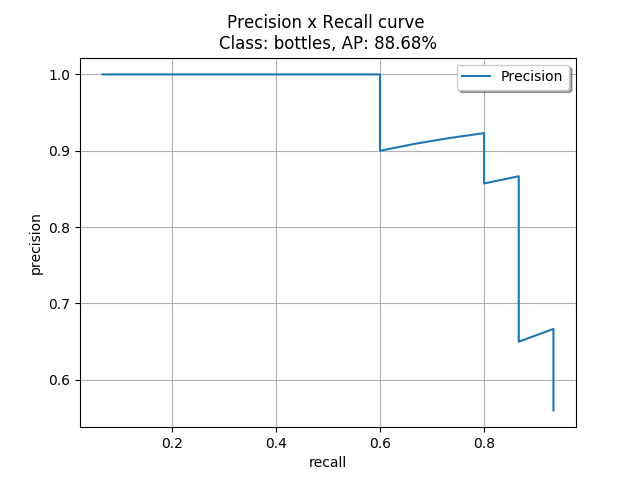

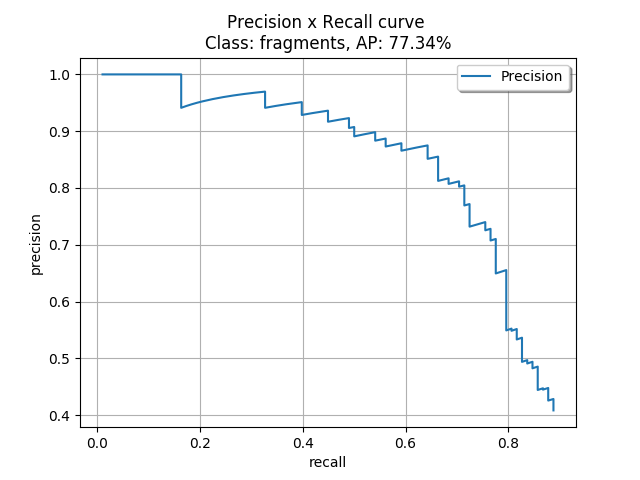

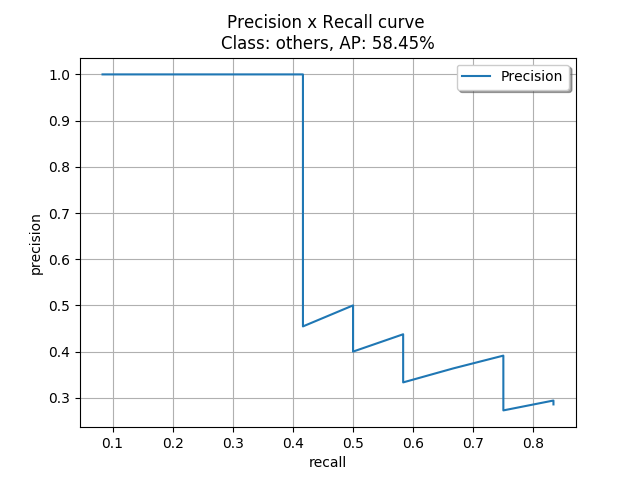

In [24]:
from IPython.display import Image
from IPython.display import display
bottles = Image('./plots/bottles.png') 
fragments = Image('./plots/fragments.png')
others = Image('./plots/others.png')
display(bottles, fragments, others)